In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
#from keras import regularizers
from keras.optimizers import SGD

In [4]:
x_train = pd.read_csv('dos_inputtrain - Copy.csv',low_memory=False)

x_test = pd.read_csv('dos_inputtest - Copy.csv')


In [5]:
label_train = pd.read_csv('label_train.csv') 

In [6]:
label_test = pd.read_csv('label_test.csv') 

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df_train_object=x_train.loc[:, x_train.dtypes == np.object]
df_test_object=x_test.loc[:, x_test.dtypes == np.object]
cl = df_test_object.columns

In [9]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
le = LabelEncoder()
# create a list of categorical columns to iterate over
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cl:
    encode(x_train[columns])
for columns in cl:
    encode(x_test[columns])

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xtrain_std = sc.fit_transform(x_train)
Xtest_std = sc.fit_transform(x_test)

In [13]:
len(Xtrain_std[0])

42

In [14]:
from sklearn import decomposition
# Create a pca object with the 6 components as a parameter
pca = decomposition.PCA(n_components=42)

# Fit the PCA and transform the data
Xtrain_std_pca = pca.fit_transform(Xtrain_std)
Xtest_std_pca = pca.fit_transform(Xtest_std)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain_std_pca,label_train, test_size=0.2,random_state=0)

In [17]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(42,)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='softmax'),
])
epochs = 40
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [144]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=epochs,
          validation_data=(X_val, Y_val))

Train on 203552 samples, validate on 50889 samples
Epoch 1/40
203552/203552 [==============================] - 27s 132us/sample - loss: 0.4618 - acc: 0.7732 - val_loss: 0.4004 - val_acc: 0.8143
Epoch 2/40
203552/203552 [==============================] - 27s 131us/sample - loss: 0.3886 - acc: 0.8200 - val_loss: 0.3748 - val_acc: 0.8261
Epoch 3/40
203552/203552 [==============================] - 26s 127us/sample - loss: 0.3688 - acc: 0.8319 - val_loss: 0.3627 - val_acc: 0.8350
Epoch 4/40
203552/203552 [==============================] - 26s 127us/sample - loss: 0.3574 - acc: 0.8386 - val_loss: 0.3520 - val_acc: 0.8394
Epoch 5/40
203552/203552 [==============================] - 33s 164us/sample - loss: 0.3500 - acc: 0.8426 - val_loss: 0.3466 - val_acc: 0.8465
Epoch 6/40
203552/203552 [==============================] - 26s 126us/sample - loss: 0.3443 - acc: 0.8468 - val_loss: 0.3409 - val_acc: 0.8498
Epoch 7/40
203552/203552 [==============================] - 26s 126us/sample - loss: 0.3395

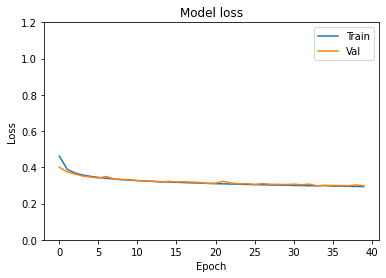

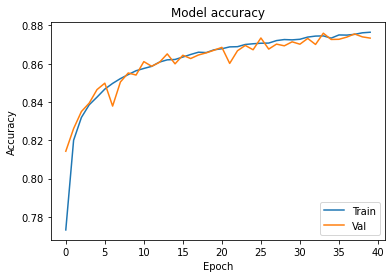

In [145]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [146]:
yout = model.predict_classes(Xtest_std_pca)

In [147]:
yout

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [148]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(label_test,yout))

accuracy =  0.5240947288006111
